In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:

TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(dir,label, "completed")
    return image_paths, labels

# Create DataFrame for training data
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

# Create DataFrame for testing data
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)


images/train angry completed
images/train disgust completed
images/train fear completed
images/train happy completed
images/train neutral completed
images/train sad completed
images/train surprise completed
images/validation angry completed
images/validation disgust completed
images/validation fear completed
images/validation happy completed
images/validation neutral completed
images/validation sad completed
images/validation surprise completed


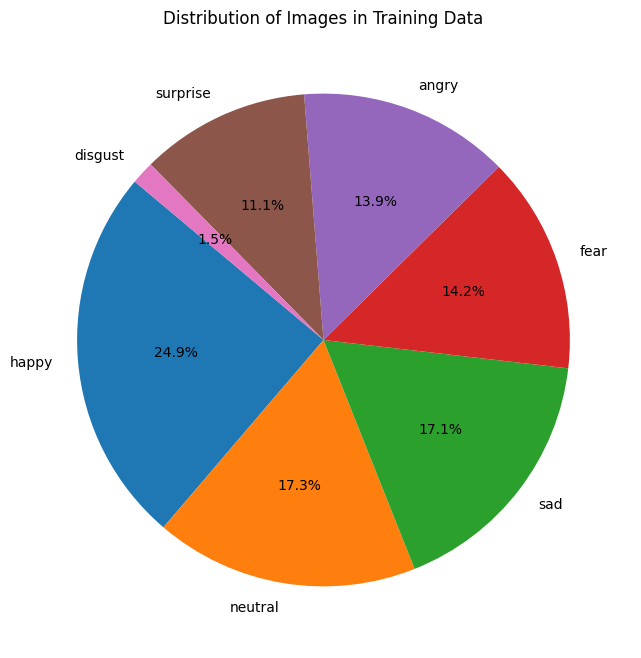

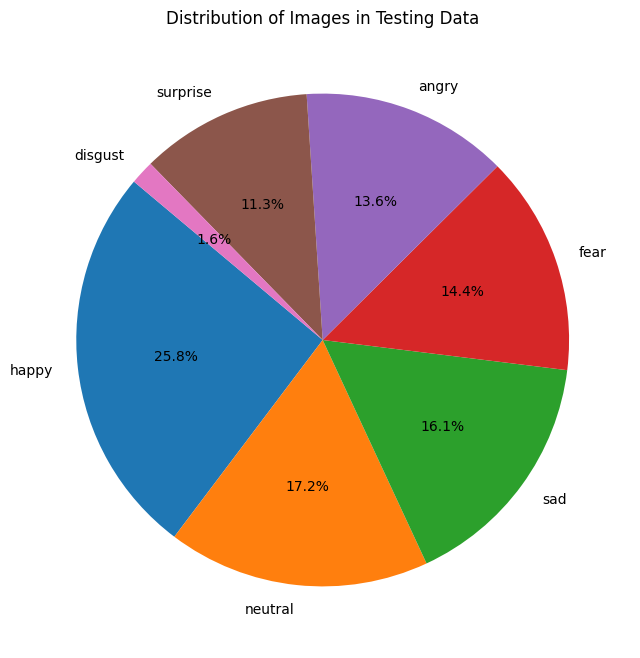

In [3]:

# Plot pie chart for training data
train_counts = train['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Training Data')
plt.show()

# Plot pie chart for testing data
test_counts = test['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Testing Data')
plt.show()


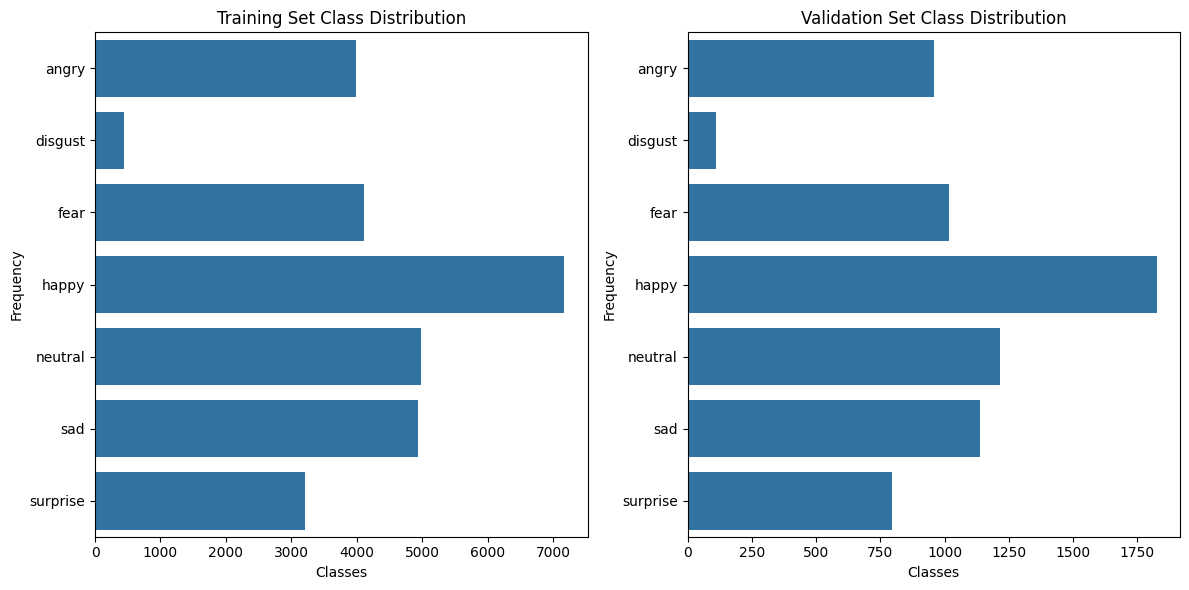

In [4]:
def plot_class_distribution(train, test, label_names):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(train['label'])
    plt.title('Training Set Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.countplot(test['label'])
    plt.title('Validation Set Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_class_distribution(train, test, train['label'].unique())

In [5]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

train_features = extract_features(train['image']) 
test_features = extract_features(test['image'])

x_train = train_features / 255.0
x_test = test_features / 255.0

100%|██████████| 7066/7066 [00:01<00:00, 6760.32it/s]


In [6]:

le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [7]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

w:\Important Documents\Manan\2 UK\MSc\Dissertation\archive\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:

history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 346ms/step - accuracy: 0.2386 - loss: 1.8372 - val_accuracy: 0.2648 - val_loss: 1.7961
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 343ms/step - accuracy: 0.2561 - loss: 1.7965 - val_accuracy: 0.3043 - val_loss: 1.7043
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 344ms/step - accuracy: 0.2972 - loss: 1.7017 - val_accuracy: 0.4026 - val_loss: 1.5254
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 344ms/step - accuracy: 0.3840 - loss: 1.5580 - val_accuracy: 0.4720 - val_loss: 1.3824
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 77s 342ms/step - accuracy: 0.4317 - loss: 1.4633 - val_accuracy: 0.4868 - val_loss: 1.3342
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 346ms/step - accuracy: 0.4620 - loss: 1.3921 - val_accuracy: 0.5062 - val_loss: 1.2772
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 352ms/step - accuracy: 0.4823 - loss: 1.3489 - val_accuracy: 0.5117 - val_loss: 1.2738
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 81s 359ms/step - accuracy: 0.4931 -

In [10]:

model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


In [11]:

json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [12]:

label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


In [13]:

image = 'images/validation/sad/1026.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
model prediction is sad


In [14]:

image = 'images/validation/happy/1074.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is happy


In [15]:

image = 'images/validation/neutral/1094.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is neutral


In [16]:

image = 'images/validation/disgust/1115.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is disgust


In [17]:

image = 'images/validation/angry/38.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
model prediction is angry


In [18]:

image = 'images/validation/surprise/78.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is surprise


In [19]:

image = 'images/validation/fear/73.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
model prediction is fear


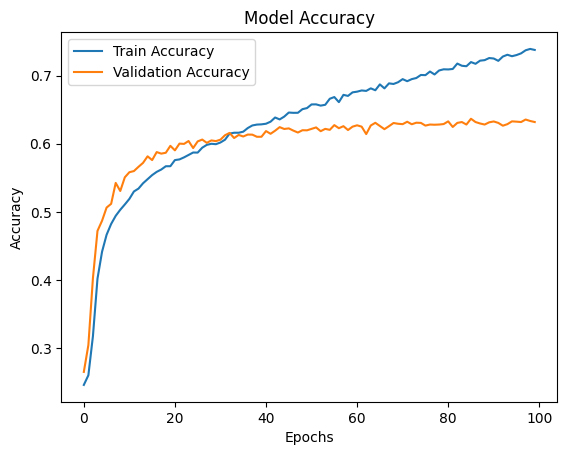

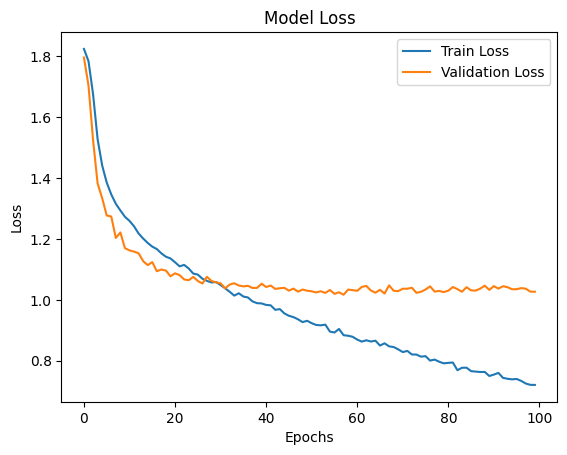

In [20]:

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        if cv2.waitKey(27) & 0xFF == ord('q'):
            break
    except cv2.error:
        pass
webcam.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [23]:

# Generate predictions for the test set
y_pred = model.predict(x_test)

# Convert the predictions from one-hot encoded to label indices
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoded to label indices
y_true_labels = np.argmax(y_test, axis=1)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step


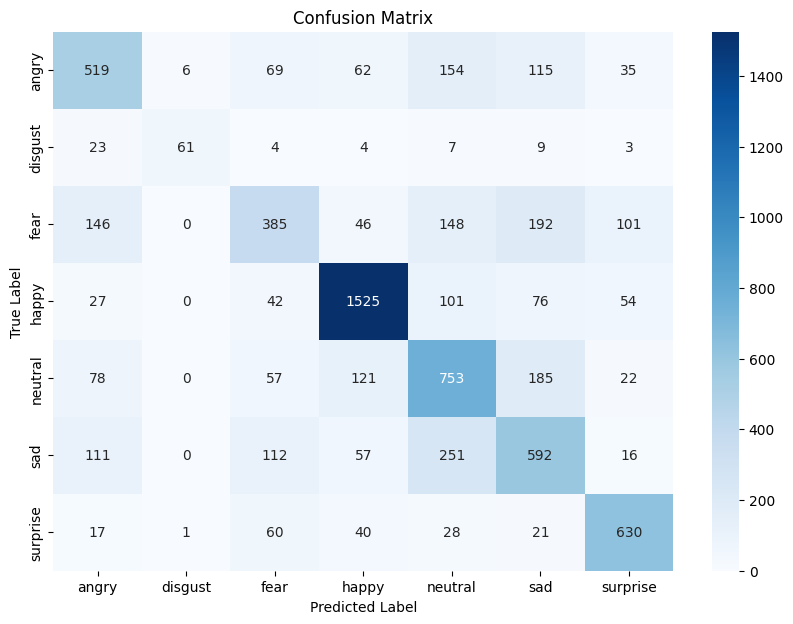

In [24]:

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [25]:
report = classification_report(y_true_classes, y_pred_classes, target_names=label)

# Print classification report which includes F1 Score
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.54      0.55       960
     disgust       0.90      0.55      0.68       111
        fear       0.53      0.38      0.44      1018
       happy       0.82      0.84      0.83      1825
     neutral       0.52      0.62      0.57      1216
         sad       0.50      0.52      0.51      1139
    surprise       0.73      0.79      0.76       797

    accuracy                           0.63      7066
   macro avg       0.65      0.60      0.62      7066
weighted avg       0.63      0.63      0.63      7066

